In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv("D:\mohamed Orabi\Data set\lending_club_loan_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_28144\2072058295.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv("D:\mohamed Orabi\Data set\lending_club_loan_dataset.csv")


In [10]:
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [12]:
df.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [13]:
for i in df:
    if df[i].dtype=='object':
        print(i)

grade
home_ownership
purpose
term


C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_28144\898848098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],ax=axis,palette='Set2')
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_28144\898848098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],ax=axis,palette='Set2')
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_28144\898848098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],ax=axis,palette='Set2')
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_28144\898848098.py:6: Futur

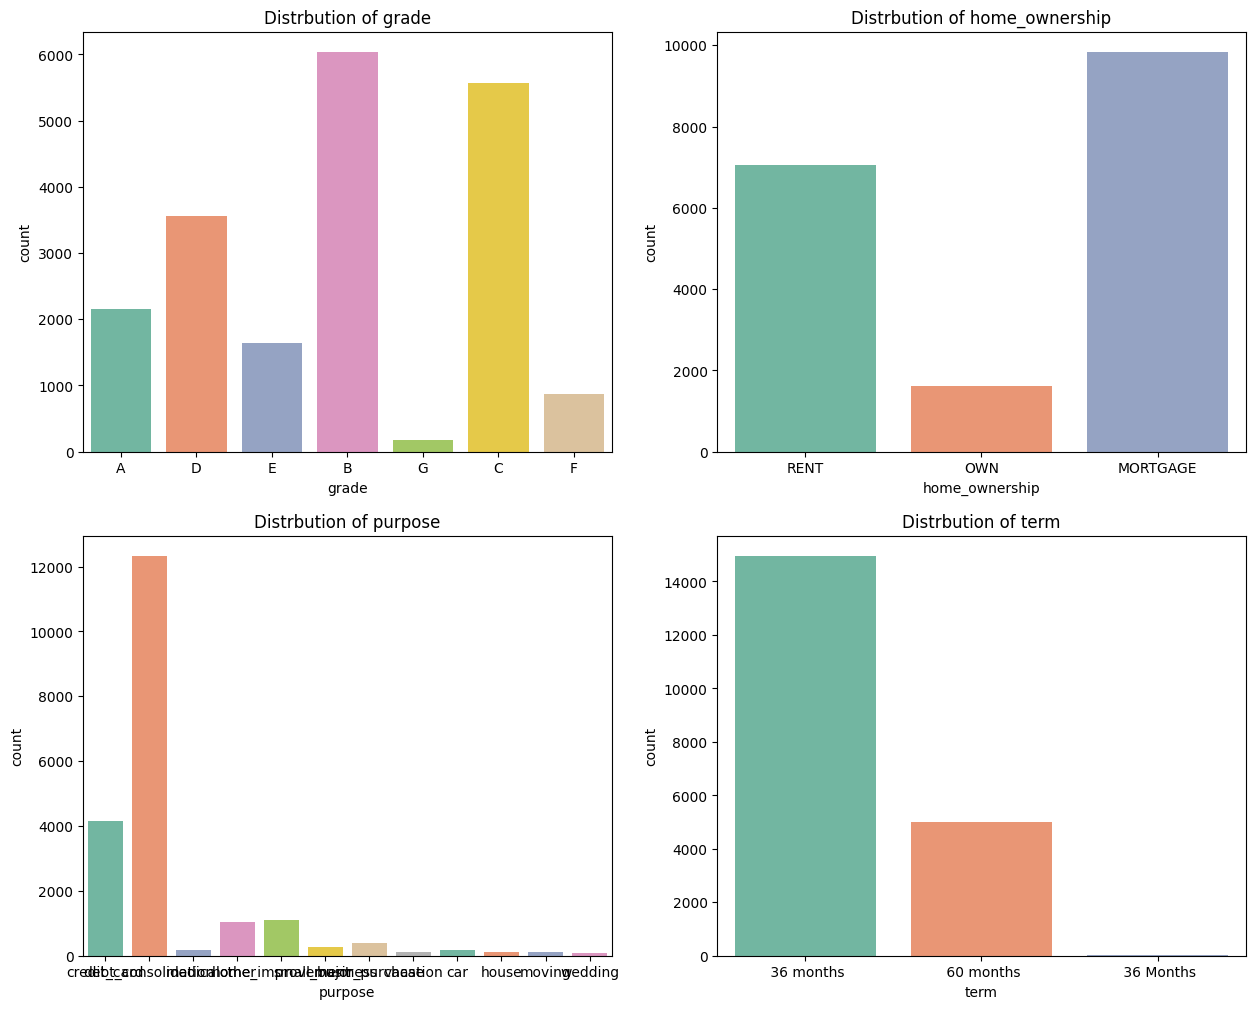

In [14]:
columns=['grade','home_ownership','purpose','term']
fig,ax=plt.subplots(2,2,figsize=(15,12))

for i,col in enumerate(columns):
    axis=ax[i//2,i%2]
    sns.countplot(x=df[col],ax=axis,palette='Set2')
    axis.set_title(f"Distrbution of {col}")
    

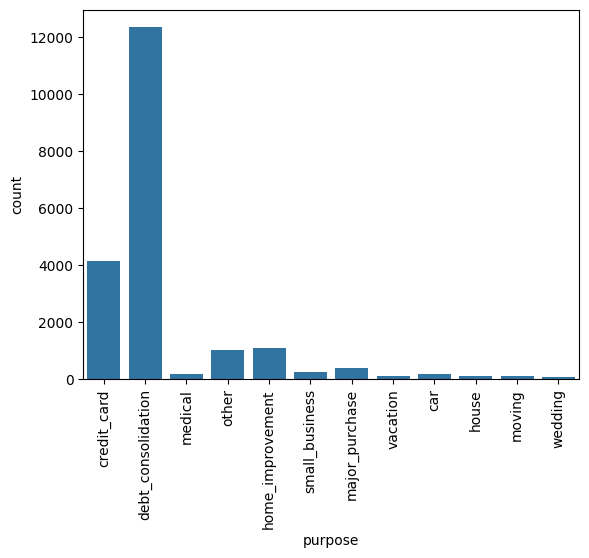

In [15]:
sns.countplot(x=df['purpose'])
plt.xticks(rotation=90)
plt.show()

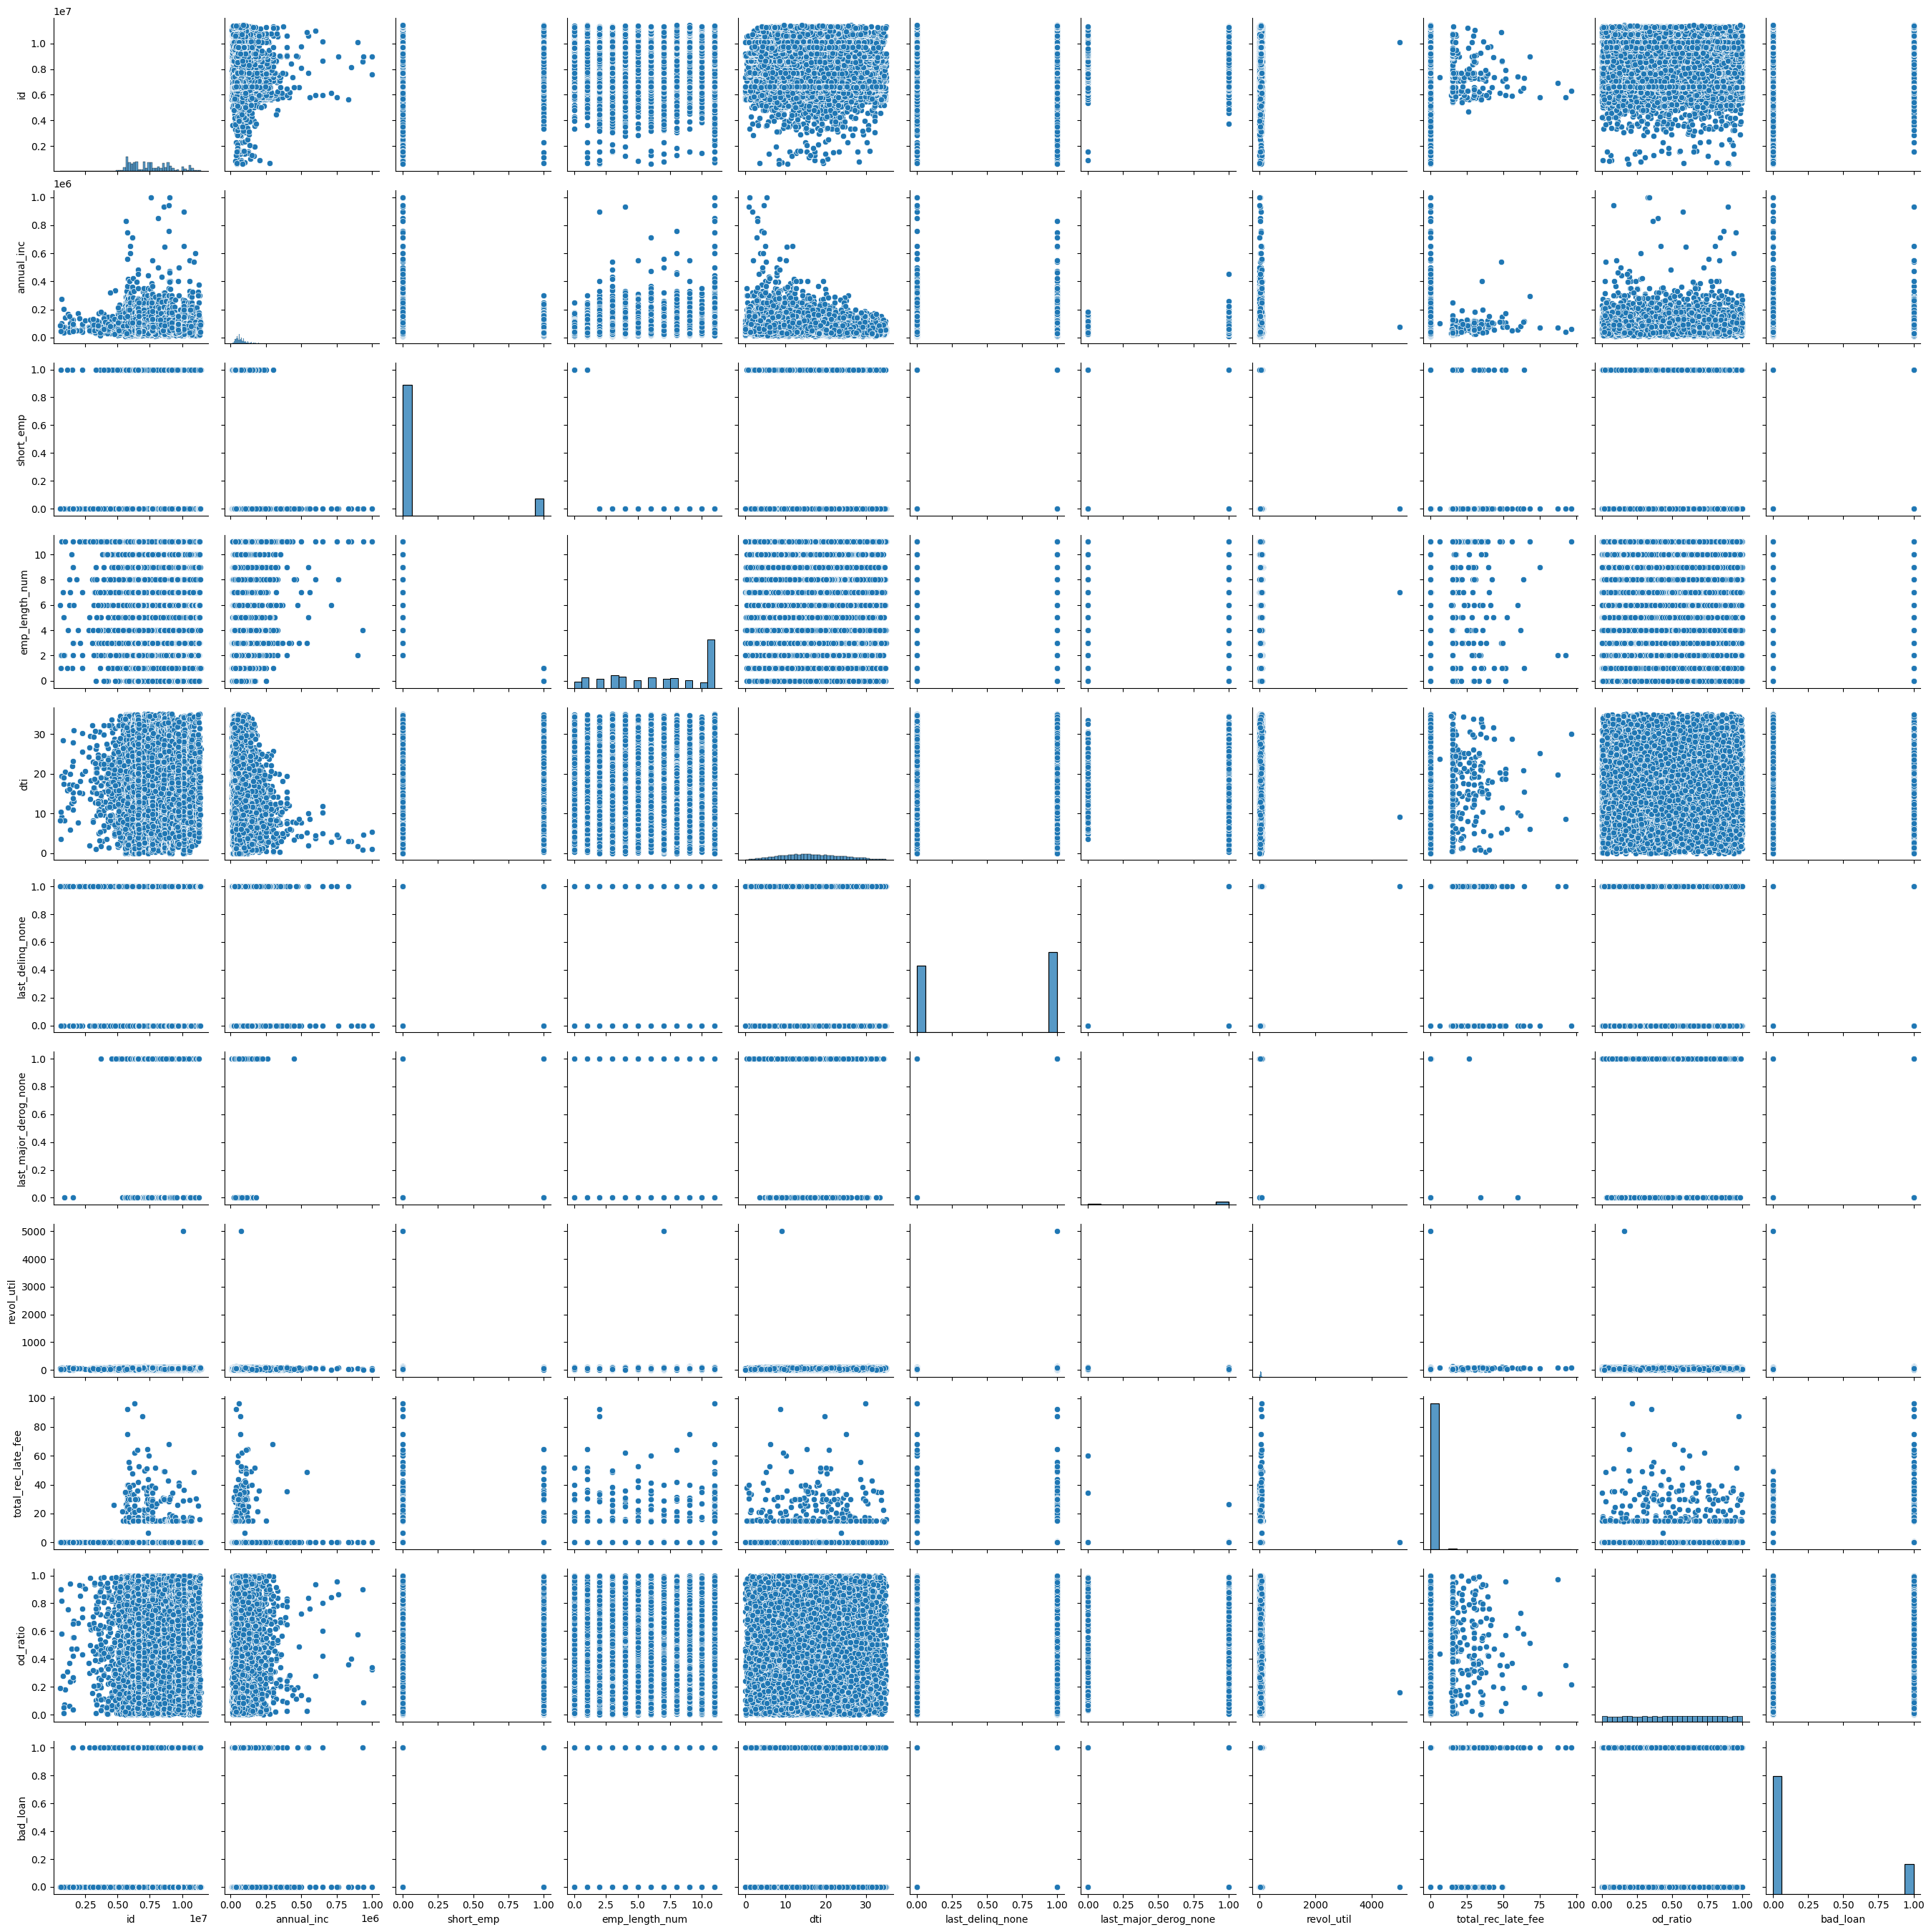

In [16]:
sns.pairplot(df)

In [17]:
df.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [18]:
df.drop("last_major_derog_none",axis=1,inplace=True)

In [19]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    9844
RENT        7052
OWN         1613
Name: count, dtype: int64

In [20]:
df['dti'].value_counts()

dti
15.87    20
19.64    20
11.45    19
9.60     19
19.25    19
         ..
33.27     1
3.18      1
2.63      1
33.44     1
32.53     1
Name: count, Length: 3295, dtype: int64

In [21]:
df['home_ownership']=df['home_ownership'].fillna("MORTGAGE")

In [22]:
np.mean(df['dti'])

16.58784137861534

In [23]:
df["dti"]=df['dti'].fillna(16.58784137861534)

In [24]:
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,47.4,0.0,0.822980,0


In [25]:
cols=['grade',"home_ownership","purpose","term"]

label=LabelEncoder()

for i in cols:
    df[i]=label.fit_transform(df[i])

df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,0,100000.0,1,1,2,26.27,1,1,1,43.2,0.0,0.160624,0
1,9604874,0,83000.0,0,4,1,5.39,1,1,0,21.5,0.0,0.810777,0
2,9684700,3,78000.0,0,11,0,18.45,2,2,1,46.3,0.0,0.035147,1
3,9695736,3,37536.0,0,6,0,12.28,6,2,0,10.7,0.0,0.534887,1
4,9795013,3,65000.0,0,11,0,11.26,2,1,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,1,27000.0,0,9,2,18.36,2,1,1,46.5,0.0,0.821782,1
19996,1576331,1,45000.0,0,2,0,23.22,5,1,0,46.2,0.0,0.652200,0
19997,6645736,1,104000.0,0,5,0,13.27,2,1,1,78.5,0.0,0.482555,0
19998,6625736,0,38400.0,0,2,0,12.84,2,1,0,47.4,0.0,0.822980,0


In [26]:
df.drop('id',axis=1,inplace=True)

In [27]:
df

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,0,100000.0,1,1,2,26.27,1,1,1,43.2,0.0,0.160624,0
1,0,83000.0,0,4,1,5.39,1,1,0,21.5,0.0,0.810777,0
2,3,78000.0,0,11,0,18.45,2,2,1,46.3,0.0,0.035147,1
3,3,37536.0,0,6,0,12.28,6,2,0,10.7,0.0,0.534887,1
4,3,65000.0,0,11,0,11.26,2,1,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,27000.0,0,9,2,18.36,2,1,1,46.5,0.0,0.821782,1
19996,1,45000.0,0,2,0,23.22,5,1,0,46.2,0.0,0.652200,0
19997,1,104000.0,0,5,0,13.27,2,1,1,78.5,0.0,0.482555,0
19998,0,38400.0,0,2,0,12.84,2,1,0,47.4,0.0,0.822980,0


In [28]:
df.describe()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,1.987750,73349.578350,0.112500,6.82140,0.78585,16.587841,2.446400,1.248350,0.546600,55.958148,0.290622,0.504430,0.20000
std,1.328529,45198.567255,0.315989,3.77423,0.93463,7.556549,1.942786,0.435754,0.497836,42.117456,3.108654,0.287720,0.40001
min,0.000000,8412.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,1.000000,47000.000000,0.000000,3.00000,0.00000,10.900000,2.000000,1.000000,0.000000,38.800000,0.000000,0.257356,0.00000
50%,2.000000,65000.000000,0.000000,7.00000,0.00000,16.260000,2.000000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,3.000000,88000.000000,0.000000,11.00000,2.00000,22.010000,2.000000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,6.000000,1000000.000000,1.000000,11.00000,2.00000,34.990000,11.000000,2.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [29]:
std=StandardScaler()

df=pd.DataFrame(data=std.fit_transform(df),columns=df.columns)

df

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,-1.496242,0.589645,2.808717,-1.542446,1.299103,1.281326,-0.744517,-0.569946,0.910764,-0.302926,-0.09349,-1.194963,-0.5
1,-1.496242,0.213517,-0.356034,-0.747562,0.229134,-1.481910,-0.744517,-0.569946,-1.097979,-0.818165,-0.09349,1.064764,-0.5
2,0.761952,0.102891,-0.356034,1.107167,-0.840835,0.246436,-0.229779,1.724983,0.910764,-0.229320,-0.09349,-1.631081,2.0
3,0.761952,-0.792381,-0.356034,-0.217639,-0.840835,-0.570095,1.829172,1.724983,-1.097979,-1.074597,-0.09349,0.105857,2.0
4,0.761952,-0.184736,-0.356034,1.107167,-0.840835,-0.705080,-0.229779,-0.569946,-1.097979,-0.967750,-0.09349,-1.174539,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.743510,-1.025491,-0.356034,0.577245,1.299103,0.234525,-0.229779,-0.569946,0.910764,-0.224572,-0.09349,1.103016,2.0
19996,-0.743510,-0.627239,-0.356034,-1.277484,-0.840835,0.877692,1.314434,-0.569946,-1.097979,-0.231695,-0.09349,0.513601,-0.5
19997,-0.743510,0.678145,-0.356034,-0.482601,-0.840835,-0.439079,-0.229779,-0.569946,0.910764,0.535227,-0.09349,-0.076033,-0.5
19998,-1.496242,-0.773265,-0.356034,-1.277484,-0.840835,-0.495985,-0.229779,-0.569946,-1.097979,-0.203202,-0.09349,1.107179,-0.5


In [30]:
df.describe()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,4.547474e-17,8.526513e-17,5.542233e-17,4.742873e-17,-9.947598e-18,-3.694822e-16,-1.051603e-16,-1.975309e-16,7.389644e-17,1.172396e-16,8.881784e-18,1.838529e-16,-7.105427e-18
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.496242e+00,-1.436754e+00,-3.560345e-01,-1.807407e+00,-8.408349e-01,-2.195216e+00,-1.259254e+00,-2.864874e+00,-1.097979e+00,-1.328654e+00,-9.349026e-02,-1.752976e+00,-5.000000e-01
25%,-7.435103e-01,-5.829883e-01,-3.560345e-01,-1.012523e+00,-8.408349e-01,-7.527224e-01,-2.297789e-01,-5.699456e-01,-1.097979e+00,-4.073982e-01,-9.349026e-02,-8.587542e-01,-5.000000e-01
50%,9.220958e-03,-1.847357e-01,-3.560345e-01,4.732209e-02,-8.408349e-01,-4.338615e-02,-2.297789e-01,-5.699456e-01,9.107642e-01,2.711181e-02,-9.349026e-02,7.821220e-03,-5.000000e-01
75%,7.619522e-01,3.241428e-01,-3.560345e-01,1.107167e+00,1.299103e+00,7.175623e-01,-2.297789e-01,-5.699456e-01,9.107642e-01,4.260063e-01,-9.349026e-02,8.666298e-01,-5.000000e-01
max,3.020146e+00,2.050228e+01,2.808717e+00,1.107167e+00,1.299103e+00,2.435321e+00,4.402861e+00,1.724983e+00,9.107642e-01,1.176274e+02,3.093891e+01,1.722075e+00,2.000000e+00


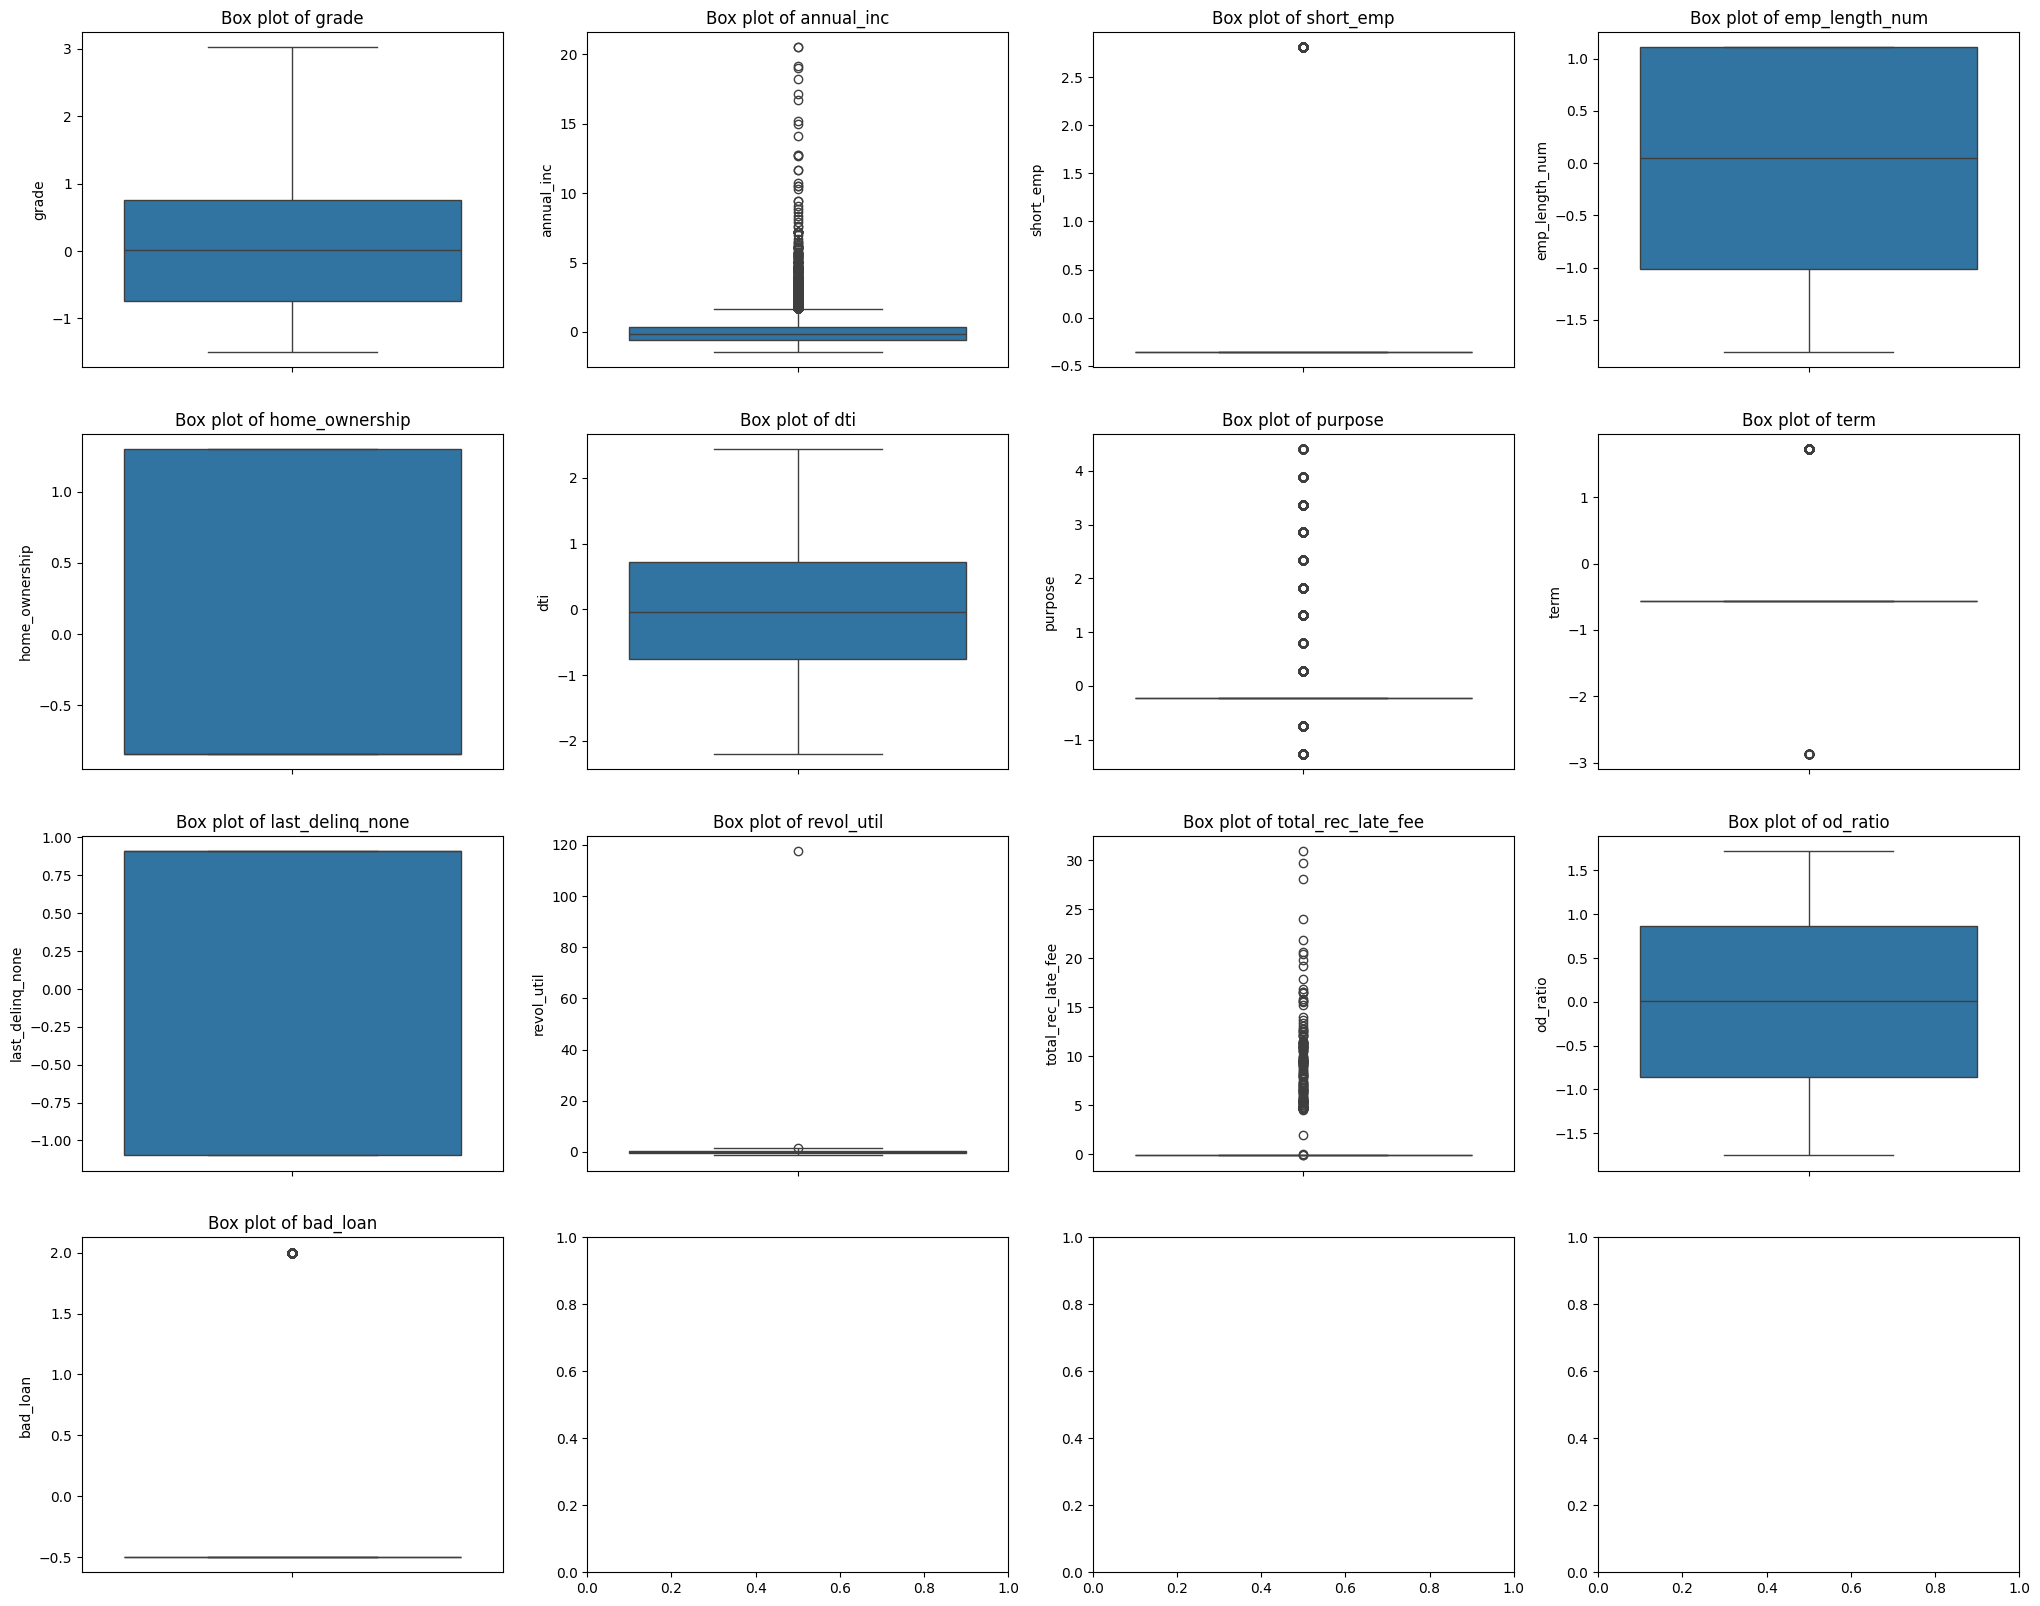

In [31]:
fig,ax=plt.subplots(4,4,figsize=(25,20))

for i,col in enumerate(df):
    axis=ax[i//4,i%4]
    sns.boxplot(df[col],ax=axis)
    axis.set_title(f"Box plot of {col}")
    
plt.show()

In [32]:
Q1=df['annual_inc'].quantile(0.25)
Q3=df['annual_inc'].quantile(0.75)

IQR=Q3-Q1

Threshold=1.5

min=Q1-Threshold*IQR
max=Q3+Threshold*IQR

outlier_mask=((df['annual_inc']<min)|(df['annual_inc']>max))
df=df[~outlier_mask]

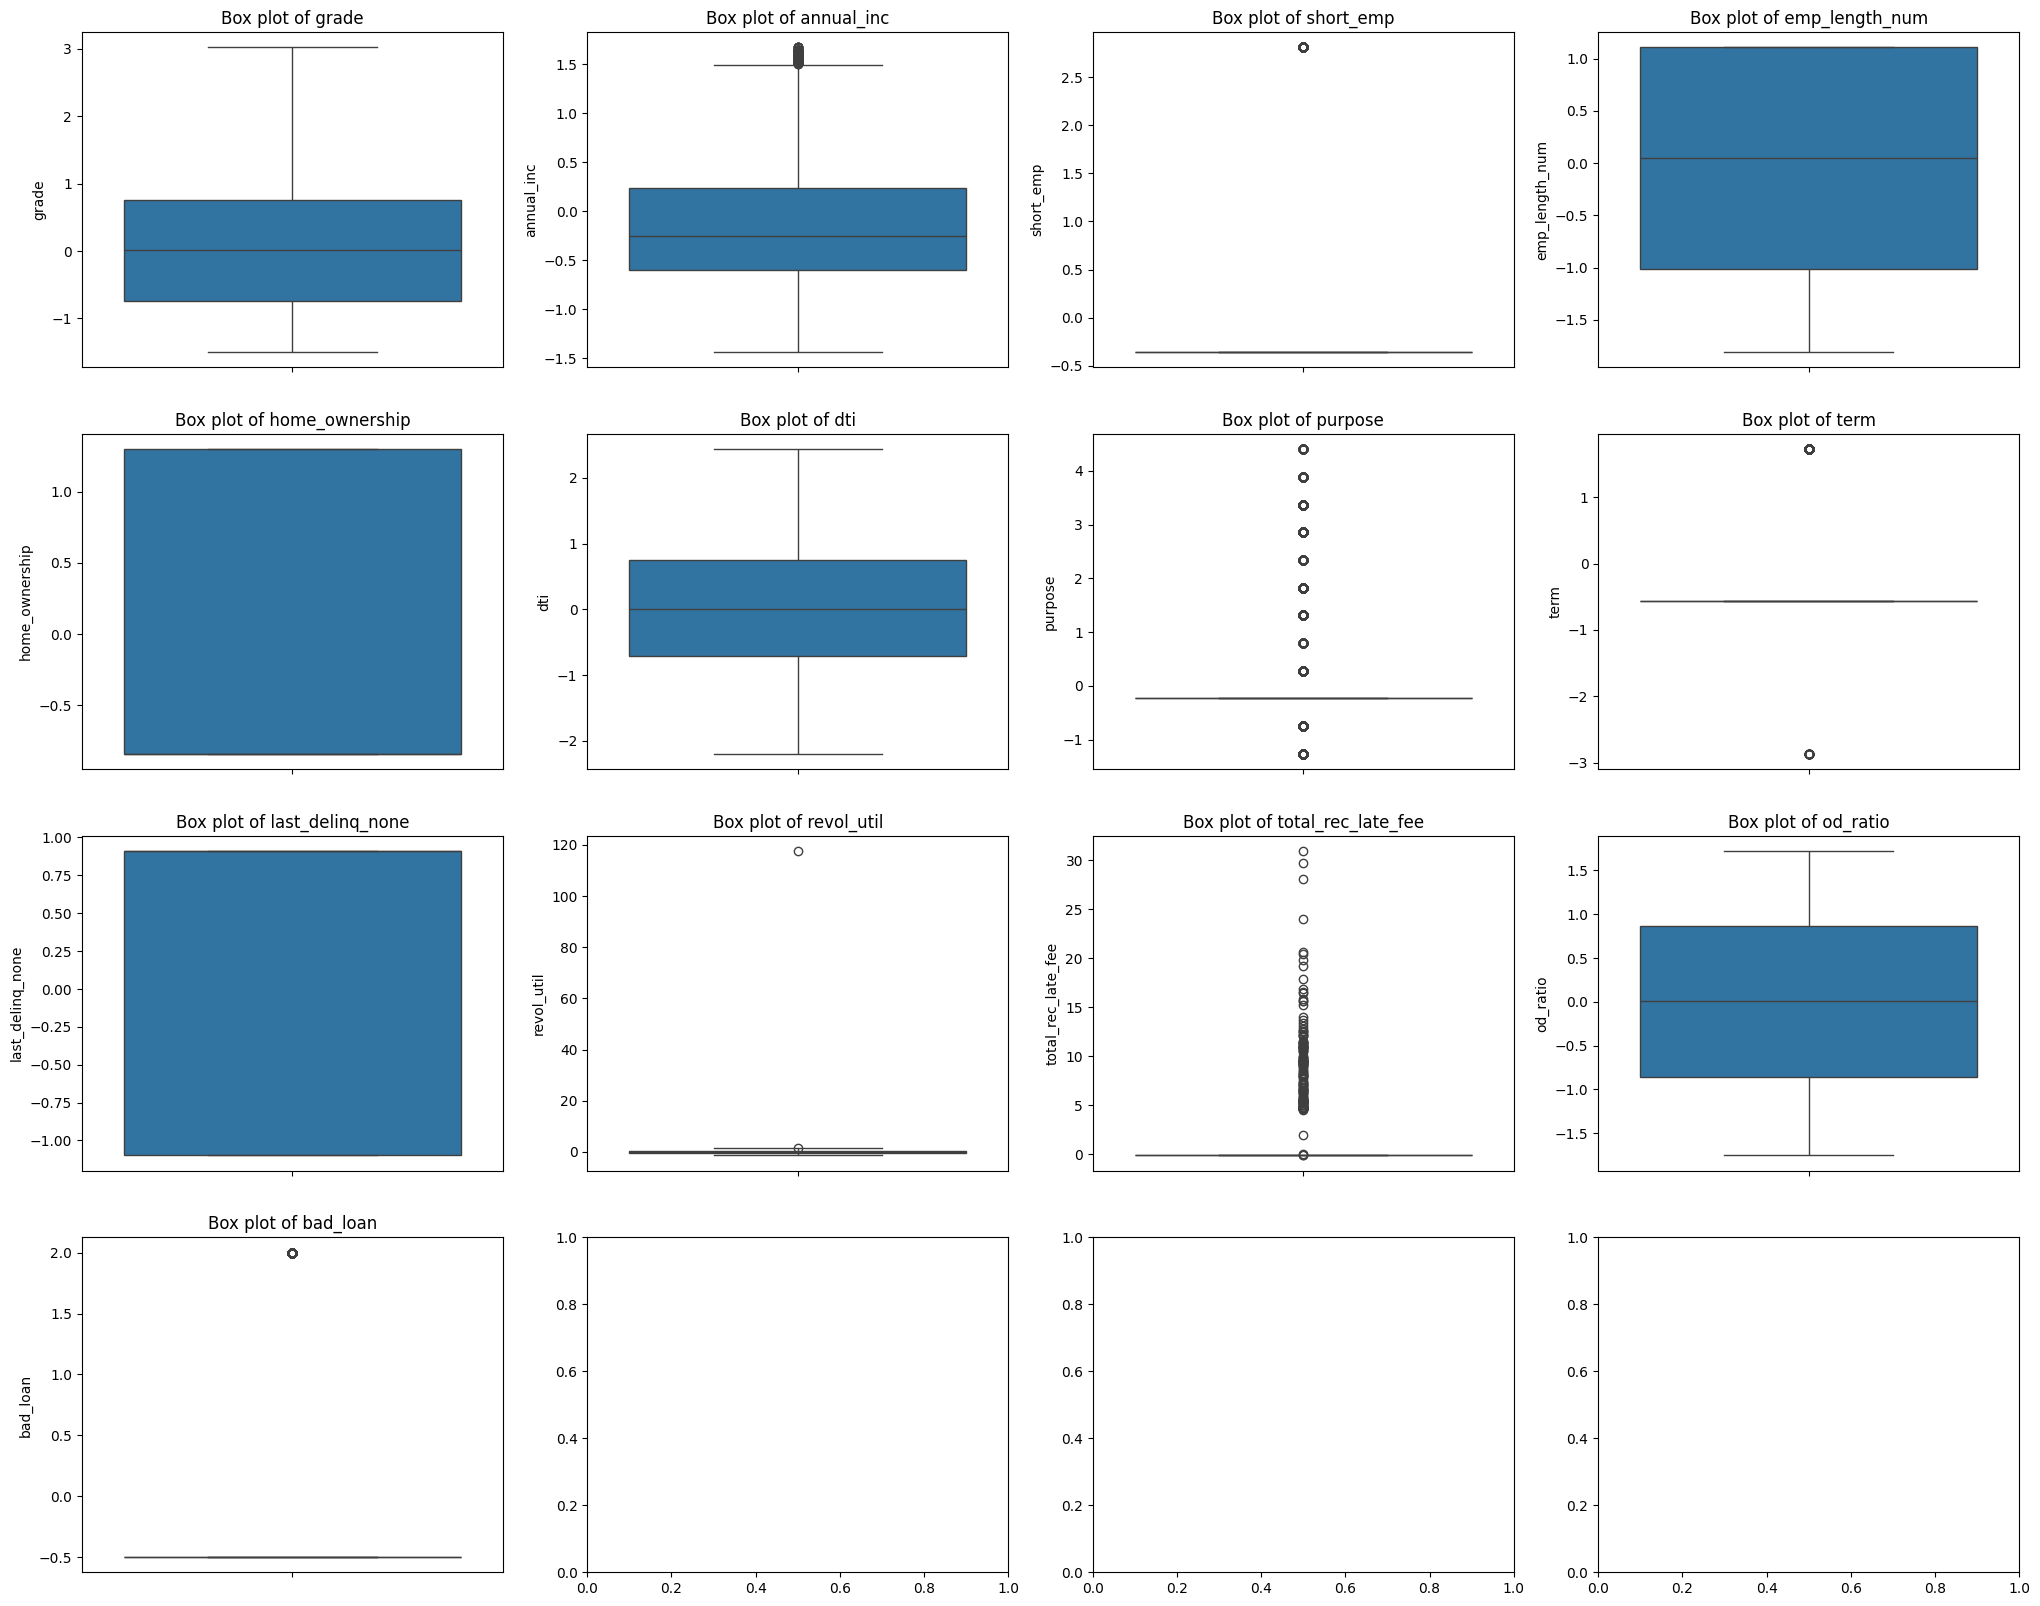

In [33]:
fig,ax=plt.subplots(4,4,figsize=(25,20))

for i,col in enumerate(df):
    axis=ax[i//4,i%4]
    sns.boxplot(df[col],ax=axis)
    axis.set_title(f"Box plot of {col}")
    
plt.show()

In [34]:
x=df.drop("bad_loan",axis=1)

y=df['bad_loan']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [36]:
lr=LinearRegression()

lr.fit(x_train,y_train)

ypred=lr.predict(x_test)


In [37]:
print(f"Mean absolute error is : {mean_absolute_error(y_test,ypred)}")
print(f"Mean squared error is : {mean_squared_error(y_test,ypred)}")
print(f"sqrt Mean squared error is : {np.sqrt(mean_squared_error(y_test,ypred))}")
print(f"explained variance score is : {explained_variance_score(y_test,ypred)}")

Mean absolute error is : 0.7275207328717569
Mean squared error is : 0.9051834346549069
sqrt Mean squared error is : 0.9514112857512816
explained variance score is : 0.07332656613294386
